In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load digits dataset [cite: 14]
digits = datasets.load_digits()
X, y = digits.data, digits.target

print(f"Dataset Shape: X={X.shape}, y={y.shape}")

Dataset Shape: X=(1797, 64), y=(1797,)


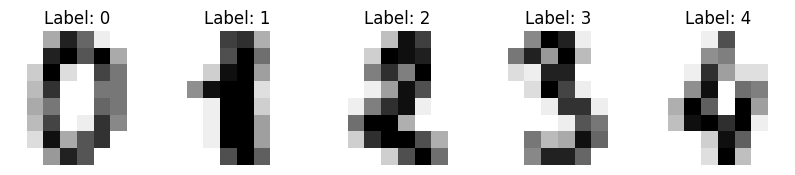

In [2]:
# 2. Visualize few digit images
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")
plt.show()

In [3]:
# 3. Split dataset into training and testing sets [cite: 16]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Apply feature scaling using StandardScaler [cite: 17]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# 5. Train KNN with K=3 and evaluate [cite: 18]
knn_3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
acc_3 = knn_3.score(X_test, y_test)
print(f"Accuracy with K=3: {acc_3:.4f}")

# 6. Try multiple K values (3, 5, 7, 9) and store results [cite: 19]
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)
    print(f"K={k}: Accuracy={acc:.4f}")

Accuracy with K=3: 0.9694
K=3: Accuracy=0.9694
K=5: Accuracy=0.9750
K=7: Accuracy=0.9722
K=9: Accuracy=0.9722


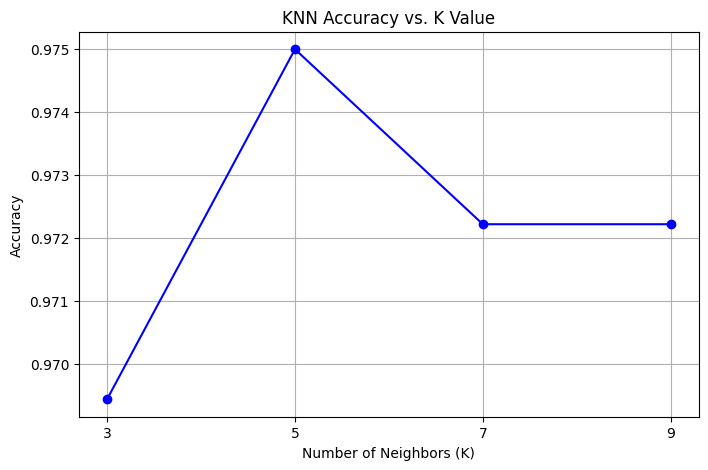

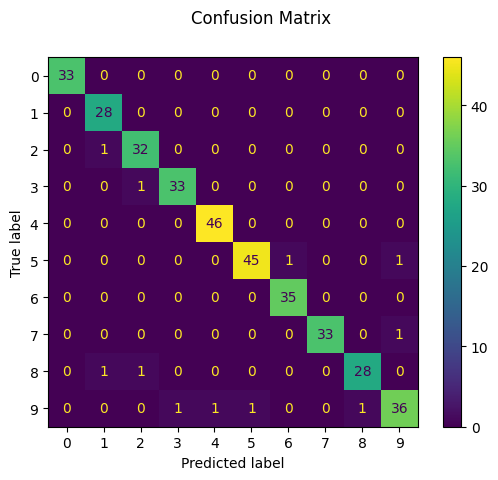


Sample Predictions vs Actuals:
Predicted: 6, Actual: 6
Predicted: 9, Actual: 9
Predicted: 3, Actual: 3
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2


In [5]:
# 7. Plot accuracy vs K graph [cite: 20, 25]
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("KNN Accuracy vs. K Value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 8. Generate confusion matrix (using best K, e.g., K=3) [cite: 21, 26]
# Re-predicting using the first model (K=3)
y_pred = knn_3.predict(X_test)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

# 9. Display 5 test images with predicted labels [cite: 22]
# Note: X_test is currently scaled. To visualize, we might want to reshape or use original images.
# Here we just show the numeric prediction vs actual.
print("\nSample Predictions vs Actuals:")
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")